# Chapter 1. The Machine Learning Landscape

In [1]:
# Download files
import os
import urllib.request

datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [2]:
# ------------------------------ Example 1-1 -----------------------------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors


def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [3]:
# Load the data
oecd_bli = pd.read_csv(f"{datapath}oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(f"{datapath}gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

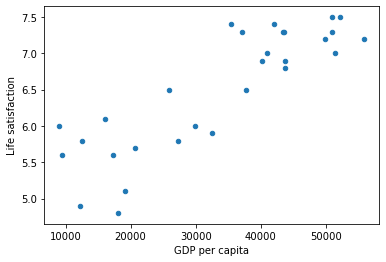

In [5]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

In [6]:
# Select a linear model
regresion = sklearn.linear_model.LinearRegression()
neighbors = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [7]:
# Train the model
regresion.fit(x, y)
neighbors.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

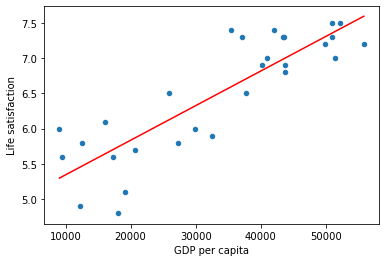

In [9]:
# Plot regression line
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.plot(x, regresion.predict(x), color='r')

In [10]:
# Make a prediction for Mexico
x_new = [[9009.2800]]  # Mexico's GDP per capita
print(regresion.predict(x_new))  # outputs [[5.2955476, should be 6.7]]
print(neighbors.predict(x_new))  # outputs [[5.5]]

[[5.2955476]]
[[5.5]]


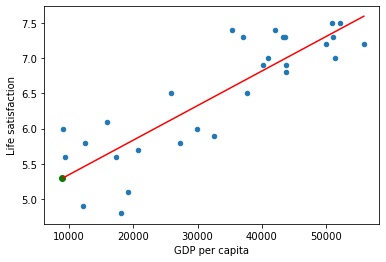

In [12]:
# Plot prediction
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.plot(x, regresion.predict(x), color='r')
plt.scatter(x_new, regresion.predict(x_new), color='g')

In [13]:
# Conclusion: we are happier than we should be